In [1]:
# Import necessary libraries
from fastai.basics import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.callback.all import *

from fastai.metrics import *
from fastai.callback.wandb import *
from pathlib import Path
import wandb

from random import sample, randint

import matplotlib.image as mpimg
from matplotlib import rcParams
import cv2
%matplotlib inline

from tqdm.auto import tqdm

# figure size in inches optional
rcParams['figure.figsize'] = 16 ,8

In [29]:
# I want to pair up images in the original crop dataset with those that 
# have been cropped, and make sure there's no extra artifacts introduced 
# by the cropping
# new_imgs = get_image_files("/scratch/rc4499/masked/hospital_systems_crop/raw")
orig_imgs = get_image_files("/scratch/rc4499/masked/hospital_systems_crop1000/raw/val")

/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient16232_study14_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/nih/00000404_000.png
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient21373_study13_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient40771_study1_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/nih/00005467_008.png
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient11344_study1_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient11305_study4_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient24061_study6_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/chexpert/patient48431_study3_view1_frontal.jpg
/scratch/rc4499/masked/hospital_systems_crop1000/raw/val/nih/00023093_015.png


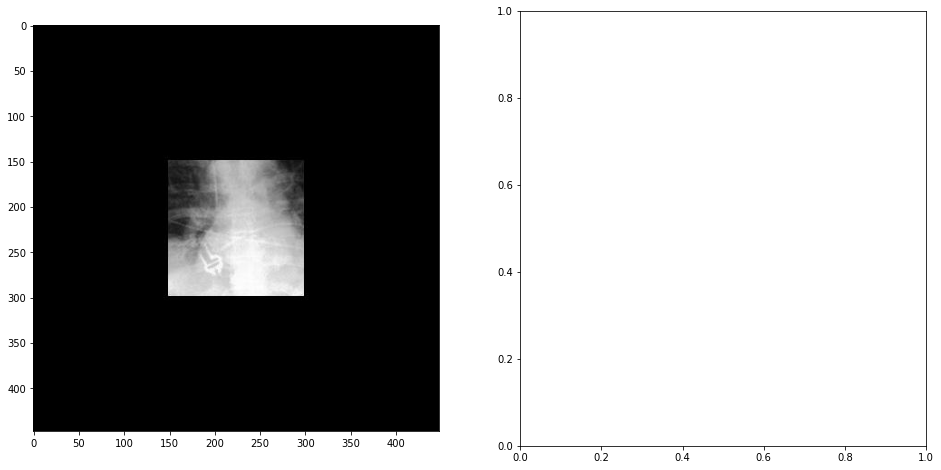

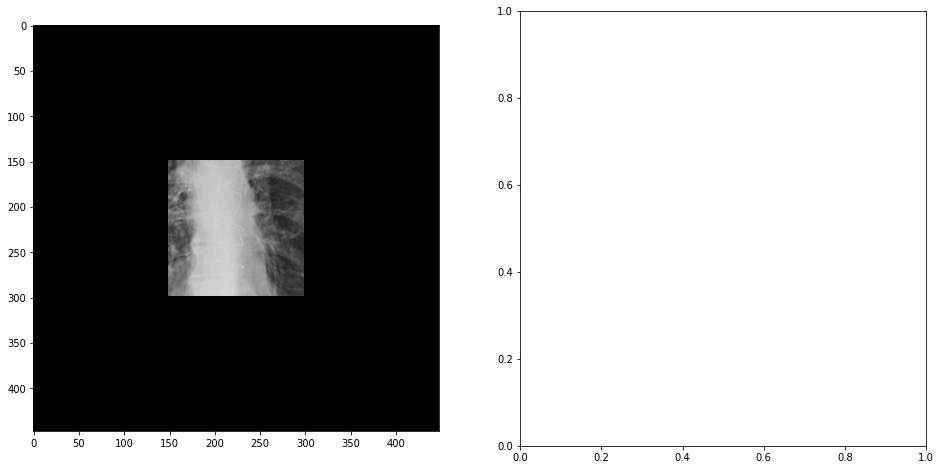

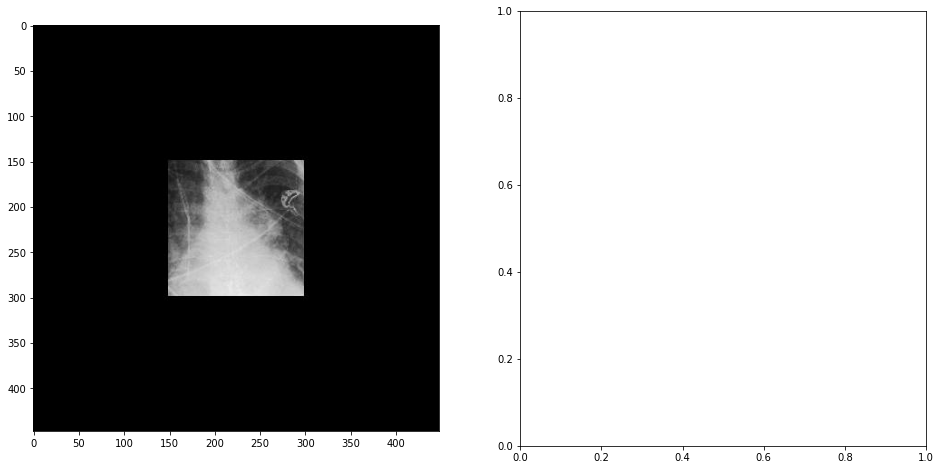

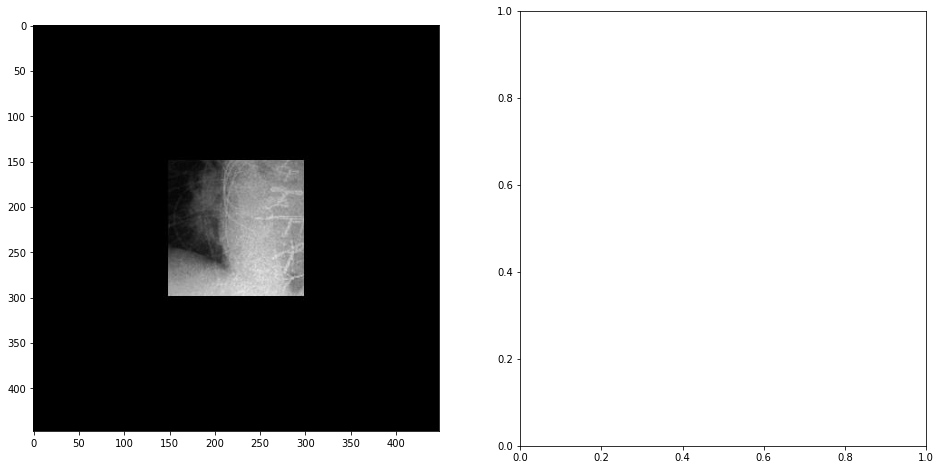

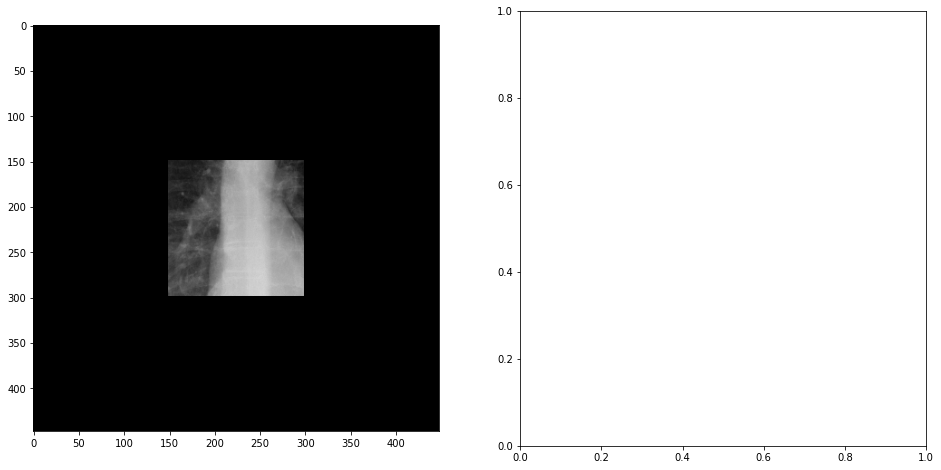

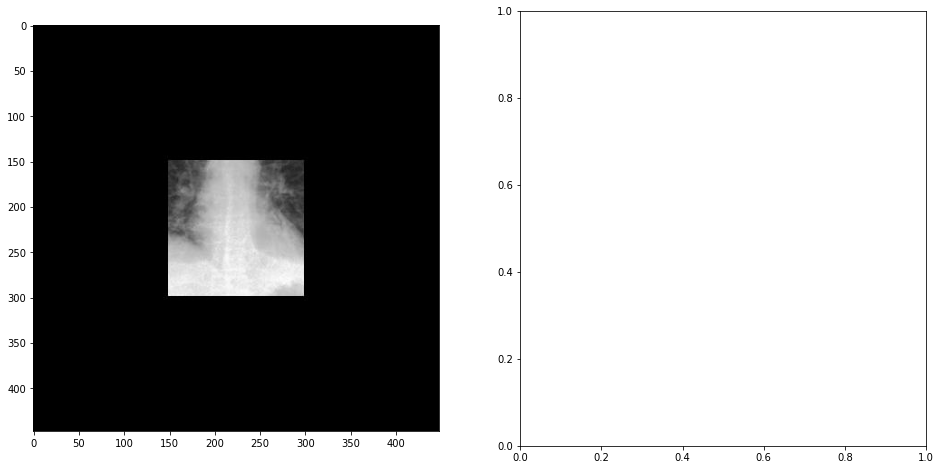

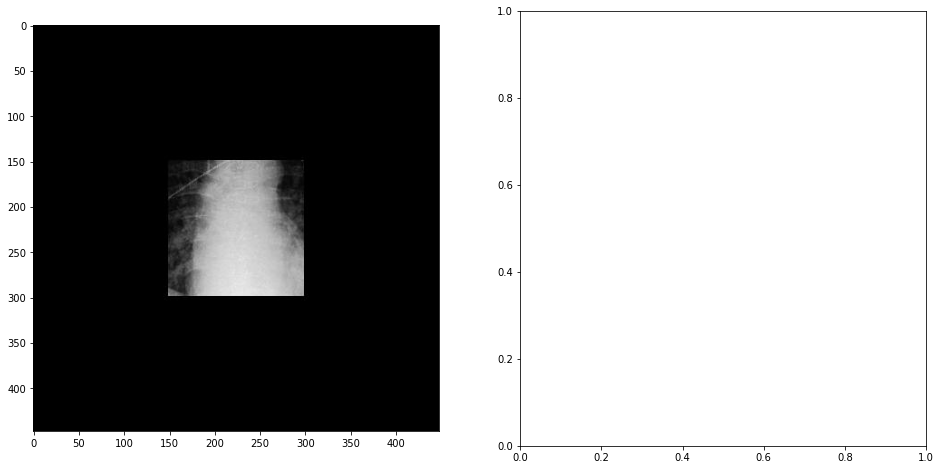

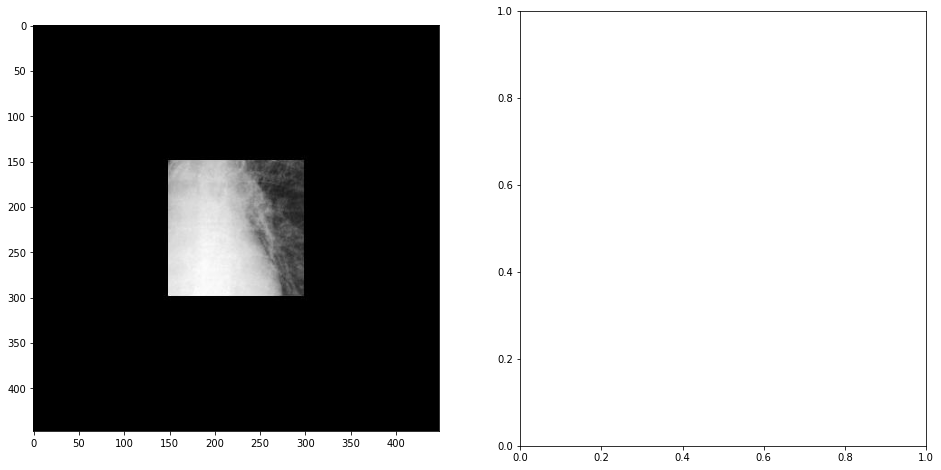

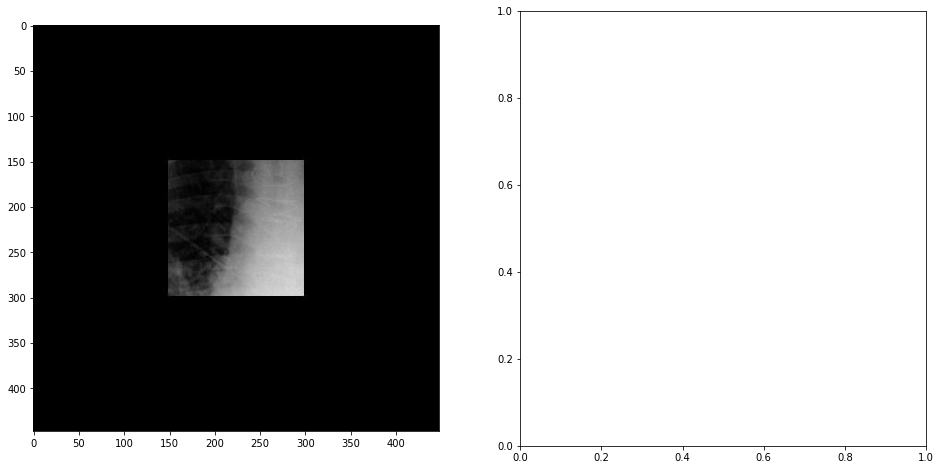

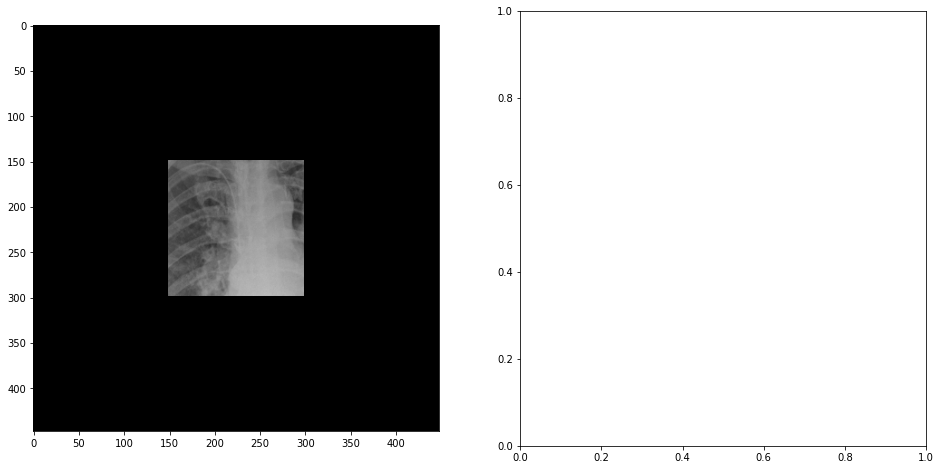

In [30]:
for orig_img in sample(orig_imgs, 10):
    # display images
    print(orig_img)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(mpimg.imread(orig_img));

In [8]:
def label_func(fname, dataset_type):
    fname = str(fname)
    if "pneumonia" in dataset_type:
        if "/NORMAL/" in fname:
            return "NORMAL"
        elif "/PNEUMONIA/" in fname:
            return "PNEUMONIA"
        else:
            raise Exception("Invalid file path")
    elif "hospital_systems" in dataset_type:
        if "/chexpert/" in fname:
            return "chexpert"
        elif "/iu/" in fname:
            return "iu"
        elif "/nih/" in fname:
            return "nih"
        else:
            raise Exception("Invalid file path")
    else:
        raise Exception("Invalid dataset type")

/scratch/rc4499/masked/hospital_systems_crop/raw/val/nih/00021149_000.png
/scratch/rc4499/masked/hospital_systems_crop/raw/val/nih/00000466_002.png
/scratch/rc4499/masked/hospital_systems_crop/raw/val/chexpert/patient26959_study1_view1_frontal.jpg


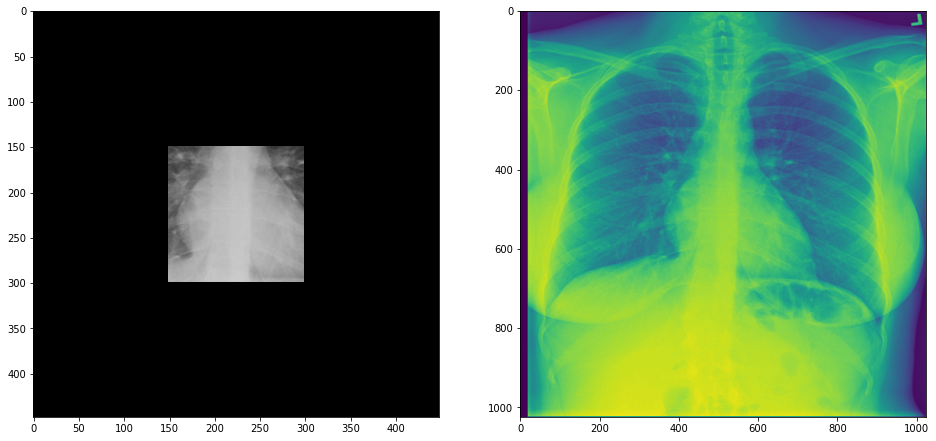

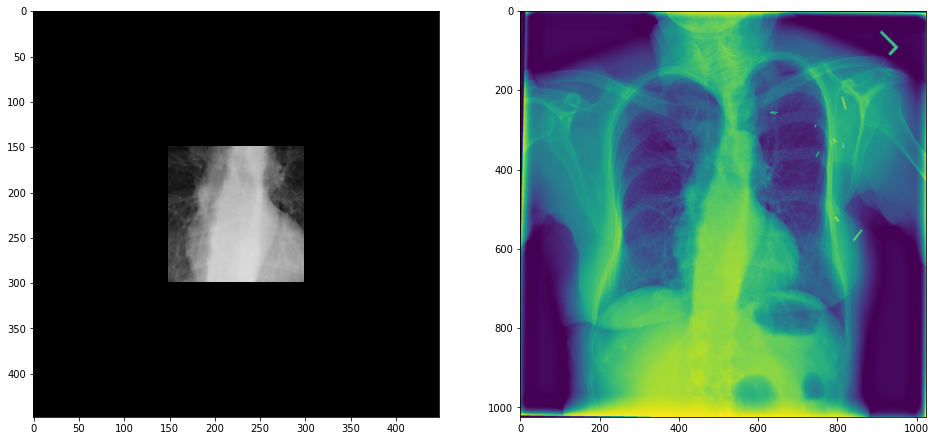

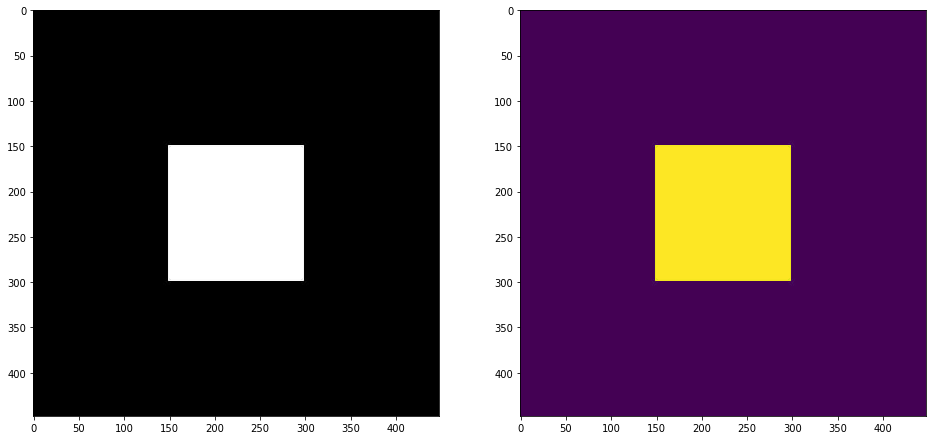

In [17]:
my_sample = sample(orig_imgs, 10)
for orig_fname in my_sample:
    # Get the img in the cropped dataset
    new_fname = f"/scratch/rc4499/hospital_systems_crop/imgs/{label_func(orig_fname, 'hospital_systems')}/{orig_fname.name}"
     # read images
    try:
        
        img_A = mpimg.imread(orig_fname)
        img_B = mpimg.imread(new_fname)

        # display images
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(img_A);
        ax[1].imshow(img_B)
        print(orig_fname)
    except Exception as e:
        pass
        # print(e)